In [1]:
import csv
from tkinter import filedialog

import matplotlib.pyplot as plt
import pandas as pd

from keys import *

# # bit clunky in a notebook
# stdFilePath = "data"
# selectedFile = filedialog.askopenfilename(initialdir=stdFilePath,
#                                           title="Select file",
#                                           filetypes=(("Only logs", "*.csv"),
#                                                      ("all files", "*.*")))
# if selectedFile == "":
#     exit("[ERR] Please select a file")

selectedFile = "data/example.csv"
df = pd.read_csv(selectedFile,
                 encoding="utf-16",
                 skiprows=range(1, 2),
                 header=0
                 )


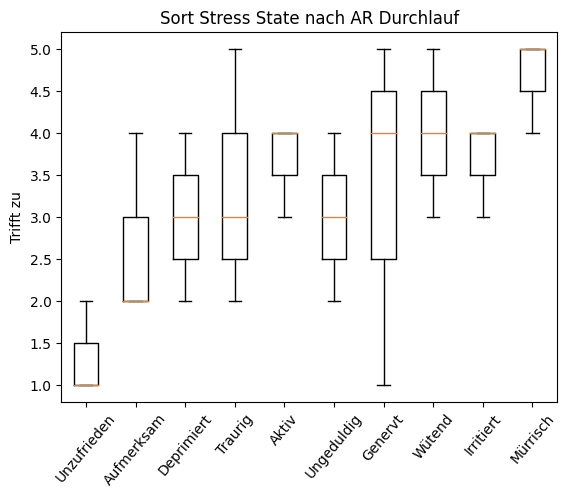

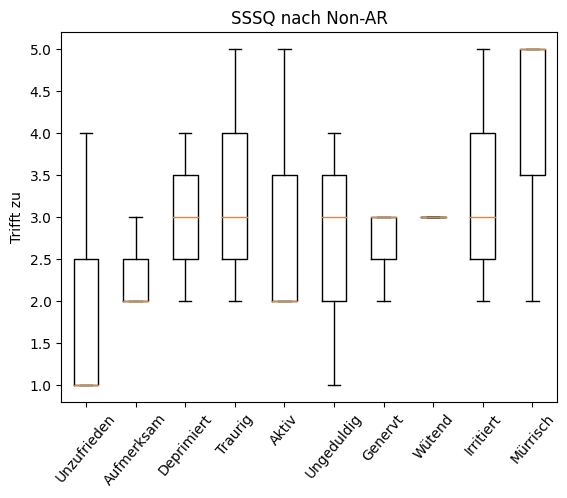

In [15]:
# df.head()
# df.dtypes
# df.columns
# df["SS01_01"].describe()

plt.boxplot(x=df[StressState_AR_Keys], labels=StressState_Names)
plt.xticks(rotation=50)
plt.title("Sort Stress State nach AR Durchlauf")
plt.ylabel("Trifft zu")
plt.show()


def makeBoxPlot(data, lables, title):
    plt.boxplot(x=data, labels=lables)
    plt.xticks(rotation=50)
    plt.title(title)
    plt.ylabel("Trifft zu")
    plt.show
    
makeBoxPlot(df[StressState_NonAR_Keys], StressState_Names, "SSSQ nach Non-AR")


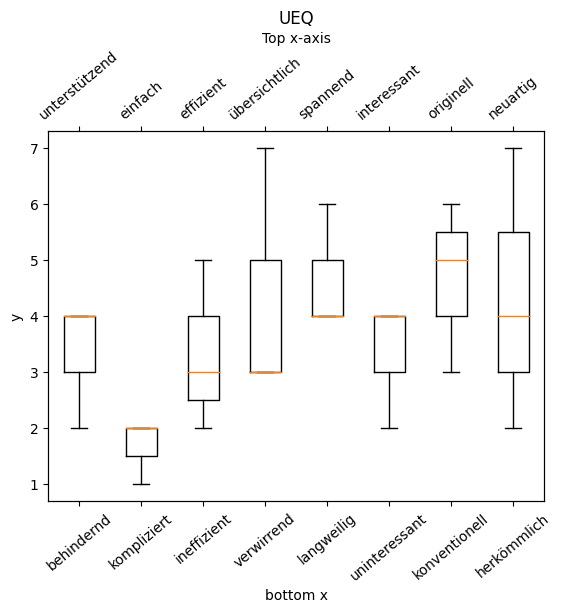

In [18]:

rot = 40
fig, ax = plt.subplots()
ax.boxplot(x=df[ShortUserExpQ_Keys])
ax.set_xlabel('bottom x')
ax.set_ylabel('y')
ax.set_title('UEQ')
ax.set_xticklabels(labels=ShortUserExpQ_Names_left, rotation=rot)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(labels=ShortUserExpQ_Names_right, rotation=rot)
ax2.set_xlabel("Top x-axis")

plt.show()

### Manual CSV reader approach

In [4]:

ages = []
StressStateAR = []

with open(selectedFile, "r", encoding="utf-16") as f:
    reader = csv.DictReader(f, delimiter=',')
    # next(reader, None)  # skip a line
    KeyToDesc = reader.__next__()
    DescToKey = {v: k for k, v in KeyToDesc.items()}  # maybe usefull
    # print(KeyToDesc)
    # reader = csv.DictReader(f, fieldnames=KeyToDesc.values(), delimiter=',')

    for row in reader:
        # print(row)
        ages.append(row["DD01_01"])
        row["SS01_01"]
        print(f'Case: {row["CASE"]}, Fragebogen: {row["QUESTNNR"]}, {KeyToDesc["SS01_01"]}: {row["SS01_01"]}')

        for key in StressState_AR_Keys:
            StressStateAR.append(row[key])
            print(row["CASE"], key, row[key])

# StressStateAR


Case: 7, Fragebogen: ArFirst, AR FeelingScale: Unzufrieden: 2
7 SS01_01 2
7 SS01_02 4
7 SS01_03 2
7 SS01_04 5
7 SS01_05 3
7 SS01_06 2
7 SS01_07 1
7 SS01_08 3
7 SS01_09 3
7 SS01_10 5
Case: 8, Fragebogen: ArFirst, AR FeelingScale: Unzufrieden: 1
8 SS01_01 1
8 SS01_02 2
8 SS01_03 3
8 SS01_04 3
8 SS01_05 4
8 SS01_06 4
8 SS01_07 4
8 SS01_08 4
8 SS01_09 4
8 SS01_10 4
Case: 10, Fragebogen: NonArFirst, AR FeelingScale: Unzufrieden: 1
10 SS01_01 1
10 SS01_02 2
10 SS01_03 4
10 SS01_04 2
10 SS01_05 4
10 SS01_06 3
10 SS01_07 5
10 SS01_08 5
10 SS01_09 4
10 SS01_10 5
